In [1]:
## import files
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\EXCELR_ASSIGNMENTA\ASSIGNMENTS\simple linear regression 3\delivery_time.csv")


In [3]:
df.shape
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


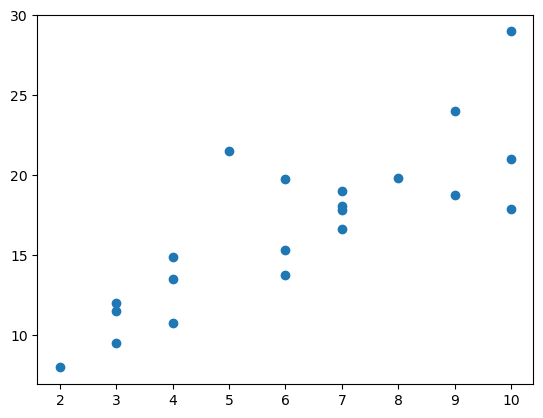

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [4]:
##eda
import matplotlib.pyplot as plt
plt.scatter(df["Sorting Time"],df["Delivery Time"])
plt.show()
df.corr()


In [5]:
##split X and Y variblrs

X=df[["Sorting Time"]]
Y=df["Delivery Time"]



In [6]:
##Fitting a model

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)


LinearRegression()

In [7]:
Y_pred = LR.predict(X)



In [10]:
# step4: calculating the metrics

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

mse = mean_squared_error(Y,Y_pred)

In [11]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Define transformation functions
def apply_log(x):
    return np.log(x + 1)  # Adding 1 to avoid log(0)

def apply_square(x):
    return np.square(x)

def apply_sqrt(x):
    return np.sqrt(x)

In [12]:
# Transform the features
X_train_log = apply_log(X_train)
X_train_square = apply_square(X_train)
X_train_sqrt = apply_sqrt(X_train)

In [13]:
# Build and train models for each transformation
model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)

model_log = LinearRegression()
model_log.fit(X_train_log, Y_train)

model_square = LinearRegression()
model_square.fit(X_train_square, Y_train)

model_sqrt = LinearRegression()
model_sqrt.fit(X_train_sqrt, Y_train)

LinearRegression()

In [14]:
# Transform the test features
X_test_log = apply_log(X_test)
X_test_square = apply_square(X_test)
X_test_sqrt = apply_sqrt(X_test)

In [15]:
# Make predictions
Y_pred_linear = model_linear.predict(X_test)
Y_pred_log = model_log.predict(X_test_log)
Y_pred_square = model_square.predict(X_test_square)
Y_pred_sqrt = model_sqrt.predict(X_test_sqrt)

In [16]:
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_pred_linear))
rmse_log = np.sqrt(mean_squared_error(Y_test, Y_pred_log))
rmse_square = np.sqrt(mean_squared_error(Y_test, Y_pred_square))
rmse_sqrt = np.sqrt(mean_squared_error(Y_test, Y_pred_sqrt))

In [17]:
# Print the RMSE values
print(f"RMSE (Linear): {rmse_linear}")
print(f"RMSE (Log): {rmse_log}")
print(f"RMSE (Square): {rmse_square}")
print(f"RMSE (Square Root): {rmse_sqrt}")


RMSE (Linear): 3.7478979383962705
RMSE (Log): 2.723613173812801
RMSE (Square): 4.776557534805919
RMSE (Square Root): 3.1403397617192867


In [18]:
print("Mean square Error", mse.round(2))
print("Root Mean square Error", np.sqrt(mse).round(2))
print("R square",r2_score(Y,Y_pred).round(2))

Mean square Error 7.79
Root Mean square Error 2.79
R square 0.68
